# Εργαστηριακή Άσκηση 3
### Προσαρμοσμένα φίλτρα και L-ASK
Αφού μελετήσετε το Κεφάλαιο 3 και, ειδικότερα, το Παράδειγμα 3.2 των
σημειώσεων, να αντιγράψετε τον Κώδικα 3.3 αυτού του παραδείγματος σε αρχείο με
το όνομα ask_errors.m (ο κώδικας επαναλαμβάνεται εδώ για διευκόλυνση). Να
εκτελέσετε στη συνέχεια τα ακόλουθα:


```{admonition} Live Code
Press the following button to make python code interactive. It will connect you to a kernel once it says "ready" (might take a bit, especially the first time it runs).
```

<div style="text-align: center;">
  <button title="Launch thebe" class="thebelab-button thebe-launch-button" onclick="initThebe()">Python Interactive Code</button>
</div>


#### Importing packages we will need later in Python

In [17]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
print("Libraries added successfully!")

Libraries added successfully!


## Μέρος 1: Διερεύνηση του κώδικα εξομοίωσης

(α) Να τροποποιηθεί ο κώδικας, ώστε τα L στοιχεία του διανύσματος x στην εντολή
14 να λαμβάνουν τιμές από το σύνολο {±d/2, ±3d/2, ±5d/2... }, όπου η απόσταση
d των σημείων θα δίνεται ως παράμετρος. Χρησιμοποιώντας για τη συνέχεια την
τιμή d=5, να επαληθεύσετε, με υπολογισμό και προβολή σχετικού ιστογράμματος,
ότι τα στοιχεία του διανύσματος x ακολουθούν πράγματι την ομοιόμορφη
κατανομή. Χρησιμοποιήστε k=mod(nnnnn,2)+3, όπου nnnnn το τελευταίο 5-
ψήφιο τμήμα του αριθμού μητρώου σας.

Κώδικας 3.3: Υπολογισμός πιθανότητας εσφαλμένου συμβόλου σύμφωνης ASK με ορθογωνικούς 

`````{tab} Python
````python

def ask_errors(k,M,nsamp,EbN0_db):
    
    L = 2**k
    SNR_db = EbN0_db - 10*np.log10(nsamp/2/k)
    SNR = 10 ** (SNR_db * 0.1)
    x = 2*np.floor(L*np.random.rand(M)) - L + 1
    P_x = (L*L-1) / 3
    Measured_x = np.sum(x*x)/len(x)

    y = []
    for i in range(len(x)):
        for j in range(nsamp):
            y.append(x[i])
    y = np.array(y)

    noise = np.random.normal(0, np.sqrt(Measured_x/SNR),len(y))
    y_noisy = y + noise

    y = np.reshape(y_noisy, (M, nsamp))
    matched = np.ones((nsamp,1))
    z = np.matmul(y, matched)
    z = z / nsamp
    l = np.arange(-L+1,L,2)

    z = z[:,0]
    for i in range(len(z)):
        differences = np.abs(l-z[i]) # Πίνακας με τις διαφορές του σήματος από τα επίπεδα
        m = min(differences)
        [index], = np.where(differences == m)
        z[i] = l[index]
    
    errors = 0
    for i in range(len(z)):
        if x[i] != z[i]:
            errors += 1
    
    return errors

````
`````
`````{tab} Matlab
````matlab
function errors=ask_errors(k,Nsymb,nsamp,EbNo)
% Η συνάρτηση αυτή εξομοιώνει την παραγωγή και αποκωδικοποίηση
% θορυβώδους σήματος L-ASK και μετρά τον αριθμό των εσφαλμένων συμβόλων.
% Επιστρέφει τον αριθμό των εσφαλμένων συμβόλων (στη μεταβλητή errors).
% k είναι ο αριθμός των bits/σύμβολο, επομένως L=2^k -- ο αριθμός των
% διαφορετικών πλατών
% Nsymb είναι ο αριθμός των παραγόμενων συμβόλων (μήκος ακολουθίας LASK)
% nsamp ο αριθμός των δειγμάτων ανά σύμβολο (oversampling ratio)
% EbNo είναι ο ανηγμένος σηματοθορυβικός λόγος Eb/No, σε db
%
L=2^k;
SNR=EbNo-10*log10(nsamp/2/k); % SNR ανά δείγμα σήματος
% Διάνυσμα τυχαίων ακεραίων {±1, ±3, ... ±(L-1)}. Να επαληθευθεί
x=2*floor(L*rand(1,Nsymb))-L+1;
Px=(L^2-1)/3; % θεωρητική ισχύς σήματος
sum(x.^2)/length(x); % μετρούμενη ισχύς σήματος (για επαλήθευση)
y=rectpulse(x,nsamp);
n=wgn(1,length(y),10*log10(Px)-SNR);
ynoisy=y+n; % θορυβώδες σήμα
y=reshape(ynoisy,nsamp,length(ynoisy)/nsamp);
matched=ones(1,nsamp);
z=matched*y/nsamp;
A=[-L+1:2:L-1];
for i=1:length(z)
[m,j]=min(abs(A-z(i)));
z(i)=A(j);
end
err=not(x==z);
errors=sum(err);
end
````
`````



Υπόδειξη: Να παραχθούν (με την εντολή 14) τουλάχιστον 40.000 τυχαίοι ακέραιοι, και να
χρησιμοποιηθεί η εντολή hist(x,A) για τον υπολογισμό και την προβολή του ιστογράμματος,όπου Α το διάνυσμα των L διαφορετικών τιμών αυτών των ακεραίων. Να τροποποιηθεί
κατάλληλα η εντολή 15 για τον θεωρητικό υπολογισμό της ισχύος και να γίνει
επαλήθευση με την εντολή 16. Ομοίως, να τροποποιηθεί κατάλληλα και η εντολή 23.


In [33]:
def ask_errors(k,M,nsamp,EbN0_db):
    
    L = 2**k
    SNR_db = EbN0_db - 10*np.log10(nsamp/2/k)
    SNR = 10 ** (SNR_db * 0.1)
    x = 2*np.floor(L*np.random.rand(M)) - L + 1
    P_x = (L*L-1) / 3
    Measured_x = np.sum(x*x)/len(x)

    y = []
    for i in range(len(x)):
        for j in range(nsamp):
            y.append(x[i])
    y = np.array(y)

    noise = np.random.normal(0, np.sqrt(Measured_x/SNR),len(y))
    y_noisy = y + noise

    y = np.reshape(y_noisy, (M, nsamp))
    matched = np.ones((nsamp,1))
    z = np.matmul(y, matched)
    z = z / nsamp
    l = np.arange(-L+1,L,2)

    z = z[:,0]
    for i in range(len(z)):
        differences = np.abs(l-z[i]) # Πίνακας με τις διαφορές του σήματος από τα επίπεδα
        m = min(differences)
        [index], = np.where(differences == m)
        z[i] = l[index]
    
    errors = 0
    for i in range(len(z)):
        if x[i] != z[i]:
            errors += 1
    
    return errors


In [31]:
def generate_histogram(k):
    M = 40000
    L = 2 ** k

    x = 2 * np.floor(L * np.random.rand(M)) - L + 1
    bins = np.arange(-L, L + 2, 2)
    A = np.arange(-(L - 1), L, 2)
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    ax.hist(x, bins=bins, edgecolor='white', color='#1F77B4')  # Use ax.hist for compatibility with widgets
    ax.set_xticks(A)
    ax.set_xlabel("Integers")
    ax.set_ylabel("Frequency")
    ax.set_title("Histogram of array x elements")
    plt.show()

k_input = widgets.IntText(
    value=3,  # default value
    description='k:',
    continuous_update=False
)

ui = widgets.VBox([k_input])
out = widgets.interactive_output(generate_histogram, {'k': k_input})

# Display the UI components
display(ui, out)

Output()

(β) Με τιμές των παραμέτρων της συνάρτησης k=4, M=60000, nsamp=20 και
EbNo=12 να εκτελέσετε τις εντολές 11 έως 22 και, στη συνέχεια, να σχεδιάσετε το
ιστόγραμμα του z με την εντολή hist(z,200). Να επαναλάβετε το παραπάνω για
EbNo=16 και EbNo=20. Τι παρατηρείτε; Να εξηγήσετε τις διαφορές στα τρία
διαγράμματα.

In [37]:
def generate_histogram(k, EbN0_db):
    M = 60000
    nsamp = 16

    L = 2**k
    SNR_db = EbN0_db - 10*np.log10(nsamp/2/k)
    SNR = 10 ** (SNR_db * 0.1)
    x = 2*np.floor(L*np.random.rand(M)) - L + 1
    P_x = (L**2 - 1) / 3
    Measured_x = np.sum(x**2)/len(x)

    y = np.repeat(x, nsamp)

    noise = np.random.normal(0, np.sqrt(Measured_x/SNR), len(y))
    y_noisy = y + noise

    y_reshaped = np.reshape(y_noisy, (M, nsamp))
    matched = np.ones((nsamp, 1))
    z = np.matmul(y_reshaped, matched) / nsamp

    A = np.arange(-(L-1), L, 2)  # Adjusted to use inside plotting
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 4))
    ax.hist(z, bins=200,  edgecolor='white', color='#1F77B4')
    ax.set_xticks(A)
    ax.set_xlabel("Integers")
    ax.set_ylabel("Frequency")
    ax.legend(["Eb/N0 = " + str(EbN0_db)])
    ax.set_title('Histogram of the Noisy Signal')
    plt.show()

k_input = widgets.IntText(
    value=4,  # default value
    description='k:',
    continuous_update=False
)

EbN0_db_slider = widgets.FloatSlider(
    value=10,  # default value
    min=0,    # minimum value
    max=20,   # maximum value
    step=0.1,   # step size
    description='Eb/N0 (dB):',
    continuous_update=False
)

ui = widgets.VBox([k_input, EbN0_db_slider])

out = widgets.interactive_output(generate_histogram, {'k': k_input, 'EbN0_db': EbN0_db_slider})

# Display the UI components
display(ui, out)

Output()

(γ) Τι κάνει η εντολή 20 και τι κάνει η εντολή 22; Τι τύπου και τι διάστασης είναι οι
μεταβλητές: x στην εντολή 14, y στην εντολή 17, y στην εντολή 20, matched, z, err
και errors; 

(δ) Να εξηγηθεί η λειτουργία του βρόχου 24-27 του Κώδικα 3.3 ως ανιχνευτή
ελάχιστης απόστασης για την L-ASK.

## Μέρος 2ο: Καμπύλες επίδοσης (BER συναρτήσει του σηματοθορυβικού λόγου)

Να επαληθεύσετε την καμπύλη του σχήματος 3.10 των σημειώσεων (για ευκολία
επαναλαμβάνεται πιο κάτω) για την L-ASK, με L=2k, k=mod(nnnnn, 2)+3, όπου nnnnn
το τελευταίο 5-ψήφιο τμήμα του αριθμού μητρώου σας. Να σχεδιάσετε τη θεωρητική
καμπύλη και να υπερθέσετε τα αποτελέσματα της εξομοίωσης (διακριτά σημεία),
όπως στο σχήμα. Να ‘διαβάσετε’ από την καμπύλη 8-ASK και να γράψετε στο αρχείο
υποβολής τις τιμές BER για Eb/No={8,14,18}db. Αντίστροφα, βρείτε την κατάλληλη
τιμή Eb/No για σύστημα 8-ASK με ρυθμό μετάδοσης R=1Mbps, έτσι ώστε ο ρυθμός
λαθών να μην υπερβαίνει την τιμή {10, 100, 1000} bps.

![lab3_1.png](../content/images/lab3_1.png)

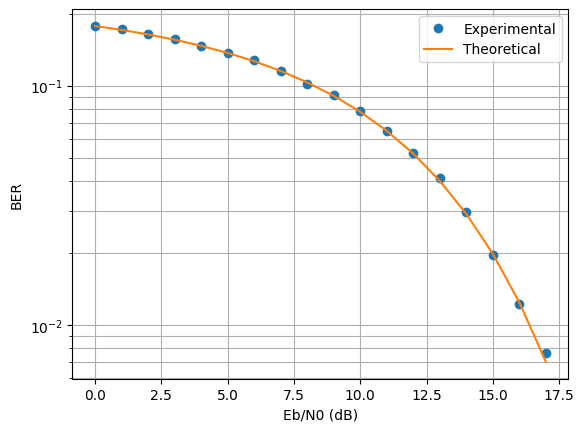

In [38]:
from scipy.special import erfc

M = 20000
k = 4
L = 2**k
nsamp = 16

ber = np.zeros(18)
for index in range (0,18):
    ber[index] = ask_errors(k,M,nsamp,index)/M/np.log2(L)

plt.semilogy(ber,'o')
plt.grid(True,which='both')
plt.xlabel("Eb/N0 (dB)")
plt.ylabel("BER")

EbN0_db = np.arange(0,18,1)
EbN0 = 10**(EbN0_db/10)
ber_theoretical = (((L-1)/L)*erfc(np.sqrt(EbN0*(3*np.log2(L))/(L**2-1))))/k
plt.semilogy(ber_theoretical)

plt.legend(['Experimental','Theoretical'])

plt.show()